In [1]:
import pandas as pd
data=pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [2]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
data.Country.unique()

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [5]:
data[data['Country']=='India'].City.unique()

array(['Ahmadabad', 'Bangalore', 'Bombay', 'Calcutta', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kanpur', 'Lakhnau', 'Madras', 'Nagpur',
       'New Delhi', 'Pune', 'Surat'], dtype=object)

In [6]:
df=data[data['City']=='Bombay']

In [7]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
30016,1796-01-01,24.317,2.190,Bombay,India,18.48N,72.68E
30017,1796-02-01,23.923,1.484,Bombay,India,18.48N,72.68E
30018,1796-03-01,24.407,2.309,Bombay,India,18.48N,72.68E
30019,1796-04-01,27.171,1.650,Bombay,India,18.48N,72.68E
30020,1796-05-01,29.050,1.290,Bombay,India,18.48N,72.68E


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2613 entries, 30016 to 32628
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2613 non-null   object 
 1   AverageTemperature             2508 non-null   float64
 2   AverageTemperatureUncertainty  2508 non-null   float64
 3   City                           2613 non-null   object 
 4   Country                        2613 non-null   object 
 5   Latitude                       2613 non-null   object 
 6   Longitude                      2613 non-null   object 
dtypes: float64(2), object(5)
memory usage: 163.3+ KB


In [9]:
df['dt']=pd.to_datetime(df['dt'])

C:\Users\admin\AppData\Local\Temp\ipykernel_2636\1030579655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt']=pd.to_datetime(df['dt'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2613 entries, 30016 to 32628
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2613 non-null   datetime64[ns]
 1   AverageTemperature             2508 non-null   float64       
 2   AverageTemperatureUncertainty  2508 non-null   float64       
 3   City                           2613 non-null   object        
 4   Country                        2613 non-null   object        
 5   Latitude                       2613 non-null   object        
 6   Longitude                      2613 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 163.3+ KB


In [11]:
df=df[['dt','AverageTemperature']]

In [12]:
df.head()

,dt,AverageTemperature
30016,1796-01-01,24.317
30017,1796-02-01,23.923
30018,1796-03-01,24.407
30019,1796-04-01,27.171
30020,1796-05-01,29.050


In [13]:
df.set_index(df['dt'],inplace=True,drop=True)

In [14]:
df.head(1)

,dt,AverageTemperature
dt,,
1796-01-01,1796-01-01,24.317


In [15]:
df=pd.DataFrame(df.AverageTemperature)

In [18]:
df.tail()

,AverageTemperature
dt,
2013-05-01,29.718
2013-06-01,27.686
2013-07-01,26.519
2013-08-01,26.953
2013-09-01,NaN


In [17]:
df.isna().sum()

AverageTemperature    105
dtype: int64

In [19]:
df=df['1970':'2012']
df.isna().sum()

AverageTemperature    0
dtype: int64

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
def adf_test(series,title):
    print('This is Augmented Dickey Fulley Test result on {}'.format(title))
    print()
    print("H0: Data has unit root and is non stationary")
    print('Ha: Data has no unit root and is stationary')
    print('if p>0.05 then accept H0 and p<=0.05 reject H0' )
    
    result=adfuller(series.dropna())
    dfout=pd.Series(result[:4],index=['Adf test stat','P-value','#lags','#observations'])
    
    if result[1]>0.05:
        print('-----------------------------------------')
        print('Data has unit root and is non stationary')
        
    else:
        print('-----------------------------------------')
        print('Data has no unit root and is stationary')

In [24]:
adf_test(df.AverageTemperature,'Average Temperature')

This is Augmented Dickey Fulley Test result on Average Temperature

H0: Data has unit root and is non stationary
Ha: Data has no unit root and is stationary
if p>0.05 then accept H0 and p<=0.05 reject H0
-----------------------------------------
Data has no unit root and is stationary


In [25]:
y=df['AverageTemperature']

In [26]:
y

dt
1970-01-01    24.599
1970-02-01    24.568
1970-03-01    25.658
1970-04-01    27.835
1970-05-01    29.348
               ...  
2012-08-01    27.405
2012-09-01    27.491
2012-10-01    28.689
2012-11-01    27.540
2012-12-01    26.828
Name: AverageTemperature, Length: 516, dtype: float64

In [27]:
train=y[:'2009']
test=y['2010':]

In [30]:
train.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2009-03-01', '2009-04-01', '2009-05-01', '2009-06-01',
               '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01',
               '2009-11-01', '2009-12-01'],
              dtype='datetime64[ns]', name='dt', length=480, freq=None)

In [29]:
test

dt
2010-01-01    26.120
2010-02-01    25.615
2010-03-01    27.362
2010-04-01    29.178
2010-05-01    30.682
2010-06-01    28.881
2010-07-01    27.364
2010-08-01    27.279
2010-09-01    27.587
2010-10-01    28.774
2010-11-01    28.883
2010-12-01    25.460
2011-01-01    24.543
2011-02-01    25.031
2011-03-01    26.990
2011-04-01    27.716
2011-05-01    29.546
2011-06-01    28.394
2011-07-01    27.133
2011-08-01    27.122
2011-09-01    27.390
2011-10-01    28.864
2011-11-01    29.040
2011-12-01    26.850
2012-01-01    23.844
2012-02-01    24.693
2012-03-01    25.574
2012-04-01    28.223
2012-05-01    29.235
2012-06-01    28.847
2012-07-01    27.941
2012-08-01    27.405
2012-09-01    27.491
2012-10-01    28.689
2012-11-01    27.540
2012-12-01    26.828
Name: AverageTemperature, dtype: float64

In [31]:
from pmdarima.arima import auto_arima

arima_model=auto_arima(train,seasonal=True,m=12,stationary=True,trace=1,random_state=42)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1156.667, Time=2.48 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1781.435, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1048.702, Time=1.02 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1311.368, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4535.087, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1539.825, Time=0.21 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1005.722, Time=3.11 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=951.200, Time=1.27 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1311.409, Time=0.46 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=992.994, Time=2.74 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1210.803, Time=1.64 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.46 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1080.607, Time=1.12 sec
 ARIMA(2,0,0)(1,0,1)[12] interc

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

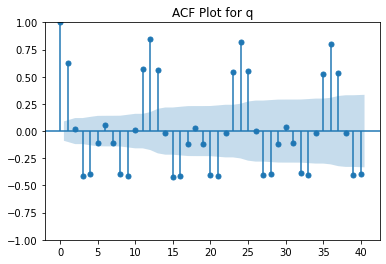

In [35]:
plot_acf(train,title='ACF Plot for q',lags=40);

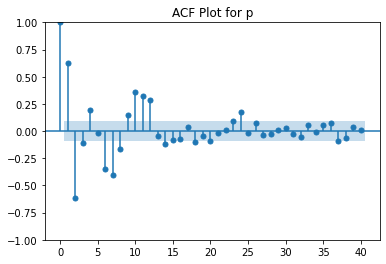

In [37]:
plot_pacf(train,title='ACF Plot for p',lags=40,method='ywm');

In [ ]:
# pacf and acf plot (p,d,q)=== (4,0,1)

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [63]:
model=ARIMA(train,order=(1,0,1))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:                  480
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -708.399
Date:                Thu, 07 Dec 2023   AIC                           1424.798
Time:                        12:24:02   BIC                           1441.493
Sample:                    01-01-1970   HQIC                          1431.360
                         - 12-01-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1438      0.132    205.729      0.000      26.885      27.402
ar.L1          0.4478      0.056      8.044      0.000       0.339       0.557
ma.L1          0.5000      0.054      9.224      0.000       0.394       0.606
sigma2         1.1184      0.081     13.823      0.000       0.960       1.277
===================================================================================
Ljung-Box (L1) (Q):                   4.57   Jarque-Bera (JB):                 3.20
Prob(Q):                              0.03   Prob(JB):                         0.20
Heteroskedasticity (H):               0.84   Skew:                            -0.09
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
model1=ARIMA(train,order=(4,0,1))
result1=model1.fit()
result1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:                  480
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -637.545
Date:                Thu, 07 Dec 2023   AIC                           1289.090
Time:                        12:24:07   BIC                           1318.306
Sample:                    01-01-1970   HQIC                          1300.574
                         - 12-01-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1506      0.082    330.493      0.000      26.990      27.312
ar.L1          0.9568      0.256      3.734      0.000       0.455       1.459
ar.L2         -0.3908      0.252     -1.551      0.121      -0.885       0.103
ar.L3         -0.3080      0.142     -2.164      0.030      -0.587      -0.029
ar.L4          0.1932      0.058      3.335      0.001       0.080       0.307
ma.L1          0.0186      0.267      0.070      0.945      -0.505       0.542
sigma2         0.8311      0.063     13.180      0.000       0.708       0.955
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.73
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.31
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
pred=result.get_forecast(steps=36)

In [76]:
pred.predicted_mean

2010-01-01    26.720834
2010-02-01    26.954395
2010-03-01    27.058991
2010-04-01    27.105832
2010-05-01    27.126809
2010-06-01    27.136203
2010-07-01    27.140410
2010-08-01    27.142294
2010-09-01    27.143138
2010-10-01    27.143516
2010-11-01    27.143685
2010-12-01    27.143761
2011-01-01    27.143795
2011-02-01    27.143810
2011-03-01    27.143817
2011-04-01    27.143820
2011-05-01    27.143821
2011-06-01    27.143822
2011-07-01    27.143822
2011-08-01    27.143822
2011-09-01    27.143822
2011-10-01    27.143822
2011-11-01    27.143822
2011-12-01    27.143822
2012-01-01    27.143822
2012-02-01    27.143822
2012-03-01    27.143822
2012-04-01    27.143822
2012-05-01    27.143822
2012-06-01    27.143822
2012-07-01    27.143822
2012-08-01    27.143822
2012-09-01    27.143822
2012-10-01    27.143822
2012-11-01    27.143822
2012-12-01    27.143822
Freq: MS, Name: predicted_mean, dtype: float64

In [73]:
pred_ci=pred.conf_int()

In [74]:
pred_ci

,lower AverageTemperature,upper AverageTemperature
2010-01-01,24.648117,28.793551
2010-02-01,24.098539,29.810251
2010-03-01,24.070681,30.047301
2010-04-01,24.091659,30.120006
2010-05-01,24.107475,30.146143
2010-06-01,24.115836,30.156571
2010-07-01,24.119835,30.160985
2010-08-01,24.121678,30.162911
2010-09-01,24.122513,30.163763
2010-10-01,24.122889,30.164143


In [79]:
import matplotlib.pyplot as plt

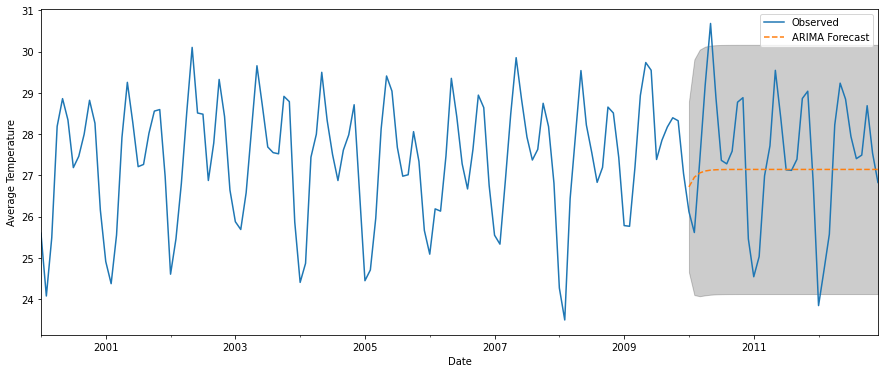

In [80]:
ax1=y['2000':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax1,label="ARIMA Forecast",figsize=(15,6),linestyle='dashed')

pred_ci=pred.conf_int()
ax1.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc='upper left');

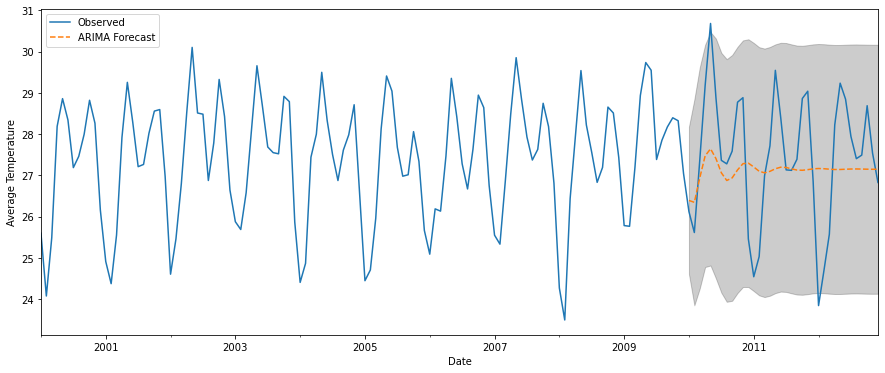

In [82]:
pred1=result1.get_forecast(steps=36)
ax1=y['2000':].plot(label='Observed')
pred1.predicted_mean.plot(ax=ax1,label="ARIMA Forecast",figsize=(15,6),linestyle='dashed')

pred_ci1=pred1.conf_int()
ax1.fill_between(pred_ci1.index,pred_ci1.iloc[:,0],pred_ci1.iloc[:,1],color='k',alpha=0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc='upper left');

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [85]:
model3=SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)
result2=model3.fit()
print(result2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                  480
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -381.775
Date:                              Thu, 07 Dec 2023   AIC                            771.550
Time:                                      12:46:00   BIC                            788.135
Sample:                                  01-01-1970   HQIC                           778.076
                                       - 12-01-2009                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3819      0.043      8.785      0.000       0.297       0.467
ar.S.L12       1.00

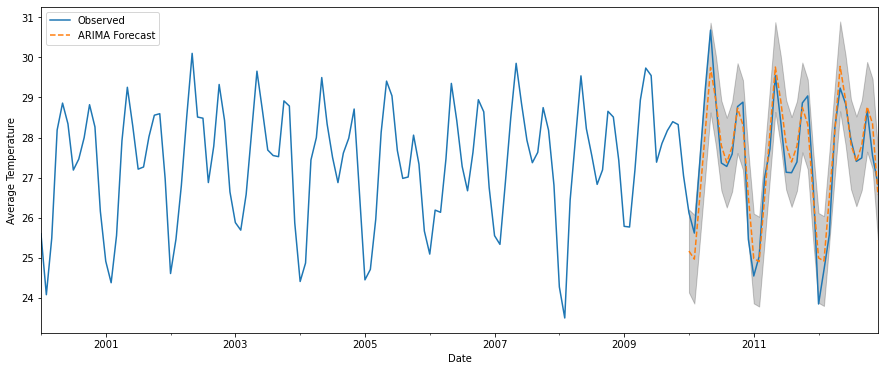

In [86]:
pred2=result2.get_forecast(steps=36)
ax1=y['2000':].plot(label='Observed')
pred2.predicted_mean.plot(ax=ax1,label="ARIMA Forecast",figsize=(15,6),linestyle='dashed')

pred_ci2=pred2.conf_int()
ax1.fill_between(pred_ci2.index,pred_ci2.iloc[:,0],pred_ci2.iloc[:,1],color='k',alpha=0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc='upper left');

In [91]:
result_pred=result2.predict(start=len(train)+36,end=len(train)+72,dynamic=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [92]:
result_pred

2013-01-01    25.008484
2013-02-01    24.929932
2013-03-01    26.520455
2013-04-01    28.146651
2013-05-01    29.794149
2013-06-01    28.953927
2013-07-01    27.848052
2013-08-01    27.419655
2013-09-01    27.822658
2013-10-01    28.783853
2013-11-01    28.360176
2013-12-01    26.580219
2014-01-01    25.022637
2014-02-01    24.944041
2014-03-01    26.535464
2014-04-01    28.162581
2014-05-01    29.811011
2014-06-01    28.970313
2014-07-01    27.863812
2014-08-01    27.435173
2014-09-01    27.838404
2014-10-01    28.800144
2014-11-01    28.376226
2014-12-01    26.595262
2015-01-01    25.036799
2015-02-01    24.958158
2015-03-01    26.550481
2015-04-01    28.178519
2015-05-01    29.827882
2015-06-01    28.986709
2015-07-01    27.879582
2015-08-01    27.450700
2015-09-01    27.854159
2015-10-01    28.816443
2015-11-01    28.392285
2015-12-01    26.610313
2016-01-01    25.050968
Freq: MS, Name: predicted_mean, dtype: float64

In [94]:
df1=df.copy()

In [95]:
df1['pred']=result_pred

In [98]:
df1.drop(columns='pred',inplace=True)

In [100]:
df2=pd.DataFrame(result_pred)

In [107]:
df2.index.names=['dt']

In [110]:
df_final=pd.concat([df1,df2],join='outer')

In [114]:
df_final

,AverageTemperature,predicted_mean
dt,,
1970-01-01,24.599,NaN
1970-02-01,24.568,NaN
1970-03-01,25.658,NaN
1970-04-01,27.835,NaN
1970-05-01,29.348,NaN
...,...,...
2015-09-01,NaN,27.854159
2015-10-01,NaN,28.816443
2015-11-01,NaN,28.392285


<AxesSubplot:xlabel='dt'>

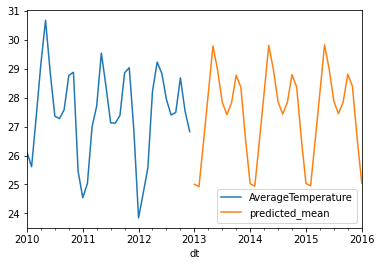

In [113]:
df_final['2010':].plot()